In [1]:
import os 

# Set the working directory to the root of the project
os.chdir(r'C:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam')
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

High-dimensional dataset  
n = 5000  
p = 1000  
4 classes (first column)   
Contains missing values, labeled -1000

In [3]:
# import dataset
df_raw_dataset = pd.read_csv(os.path.join('data', 'data_raw.txt'), sep='\t')

num_samples, num_features = df_raw_dataset.shape
df_raw_dataset.columns = ['class'] + [f'feature {i}' for i in range(1, num_features)]
num_classes = len(df_raw_dataset['class'].unique())

print(f'Number of samples: {num_samples}')
print(f'Number of features: {num_features}')
print(f'Number of classes: {num_classes}')
 
print("\nFirst 5 rows of the raw dataset:")
df_raw_dataset.head()

Number of samples: 5000
Number of features: 1001
Number of classes: 4

First 5 rows of the raw dataset:


,class,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 991,feature 992,feature 993,feature 994,feature 995,feature 996,feature 997,feature 998,feature 999,feature 1000
1,2,-1000.000000,0.493852,-0.097408,1.067132,-0.067073,-1000.000000,-0.279775,-0.615191,0.607782,...,0.324266,-1.176896,0.881978,0.954489,1.096337,0.443422,0.472010,-1.004938,1.813586,0.355279
2,1,0.146618,-0.843381,0.084083,-1.319645,-0.796130,-0.746654,2.162536,0.661785,-2.026639,...,-1.224754,-0.052719,-1.933023,0.756493,-0.801447,0.535718,0.927770,0.031396,1.388040,0.243790
3,2,-1.986901,-0.099954,0.974906,0.588525,-0.468599,-1.741473,1.122659,-0.498773,0.821948,...,0.175280,1.733996,0.504883,0.030797,-1.067338,-0.407298,0.470651,1.710230,1.549639,3.009124
4,4,0.789259,2.447201,1.200830,1.889460,0.654227,0.065656,-1000.000000,-0.792071,0.013415,...,1.511587,0.369627,0.507842,-0.107906,-1.024276,1.685745,-1000.000000,-0.173979,0.701901,-1.652574
5,4,-0.906112,0.377205,-1.073484,0.598118,-1.497231,-0.097904,-1.343775,-0.064006,-0.607471,...,-0.276598,0.946726,0.246329,-0.088163,0.480801,0.147565,0.724213,-1.113153,-1.081732,-1.033888


Generate dataset that drops missing values

In [4]:
df_raw_dataset = df_raw_dataset.replace(-1000, np.nan)

df_dropna = df_raw_dataset.dropna() # drop rows with NaN values
df_dropna.iloc[1:].to_csv(os.path.join('data', 'data_dropna.txt'), sep='\t') # save to file

num_samples_dropna, num_features_dropna = df_dropna.shape
print(f'Number of samples (dropna): {num_samples_dropna}')
print(f'Number of samples dropped: {num_samples - num_samples_dropna}')
print(f'Number of features (dropna): {num_features_dropna}') 

print("\nFirst 5 rows of the dataset without missing values:")
df_dropna.head()

Number of samples (dropna): 2020
Number of samples dropped: 2980
Number of features (dropna): 1001

First 5 rows of the dataset without missing values:


,class,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 991,feature 992,feature 993,feature 994,feature 995,feature 996,feature 997,feature 998,feature 999,feature 1000
2,1,0.146618,-0.843381,0.084083,-1.319645,-0.796130,-0.746654,2.162536,0.661785,-2.026639,...,-1.224754,-0.052719,-1.933023,0.756493,-0.801447,0.535718,0.927770,0.031396,1.388040,0.243790
3,2,-1.986901,-0.099954,0.974906,0.588525,-0.468599,-1.741473,1.122659,-0.498773,0.821948,...,0.175280,1.733996,0.504883,0.030797,-1.067338,-0.407298,0.470651,1.710230,1.549639,3.009124
7,1,-1.961148,-2.066390,1.157878,2.638431,0.380795,-1.135741,1.407938,0.641110,-0.257362,...,1.388097,0.940432,-3.248729,-1.056628,0.526422,-0.141712,-0.243878,2.261639,-0.178581,0.717398
9,3,-0.288366,1.755972,-1.144203,0.321466,1.399391,0.854409,-1.334523,-0.673844,-0.706075,...,-1.339229,-0.997101,-0.565771,2.662074,-0.520536,0.371094,-0.182359,-2.124540,-0.127067,-0.273763
10,3,2.504740,0.144209,2.255337,0.306778,1.239686,-0.452261,0.057692,1.508914,0.124645,...,1.096542,-0.198090,-0.855567,-0.923564,-0.994823,-1.253920,0.359540,-0.418368,0.423453,1.433150


## Investigate distributions

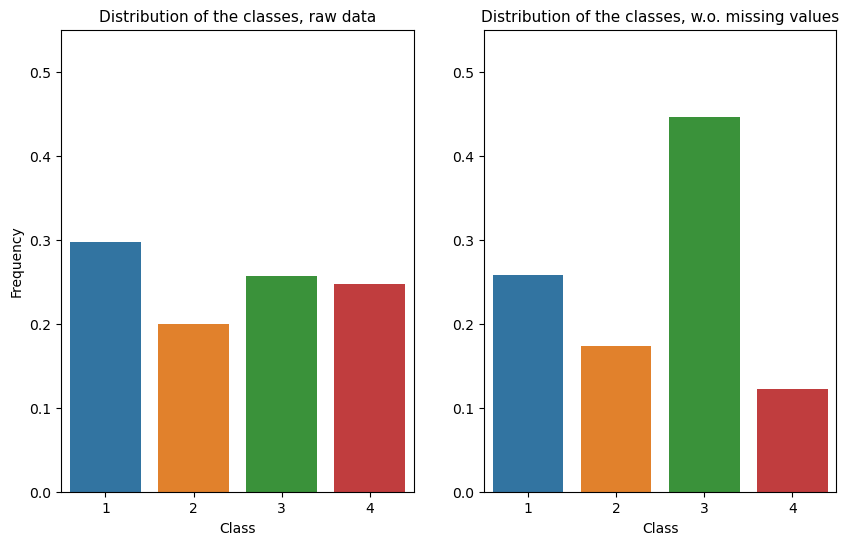

In [5]:
# Distribution of the classes
class_counts_raw = df_raw_dataset['class'].value_counts(normalize=True)
class_counts_dropna = df_dropna['class'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=class_counts_raw.index, y=class_counts_raw.values)
plt.title('Distribution of the classes, raw data', fontsize=11)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.ylim(0, 0.55)

plt.subplot(1, 2, 2)
sns.barplot(x=class_counts_dropna.index, y=class_counts_dropna.values)
plt.title('Distribution of the classes, w.o. missing values', fontsize=11)
plt.xlabel('Class')
plt.ylabel('')
plt.ylim(0, 0.55)

plt.show()

**Note**: Removing missing values makes data (more) imbalanced

Distribution of the missing values

Number of missing values per class: [584 764 884 748]


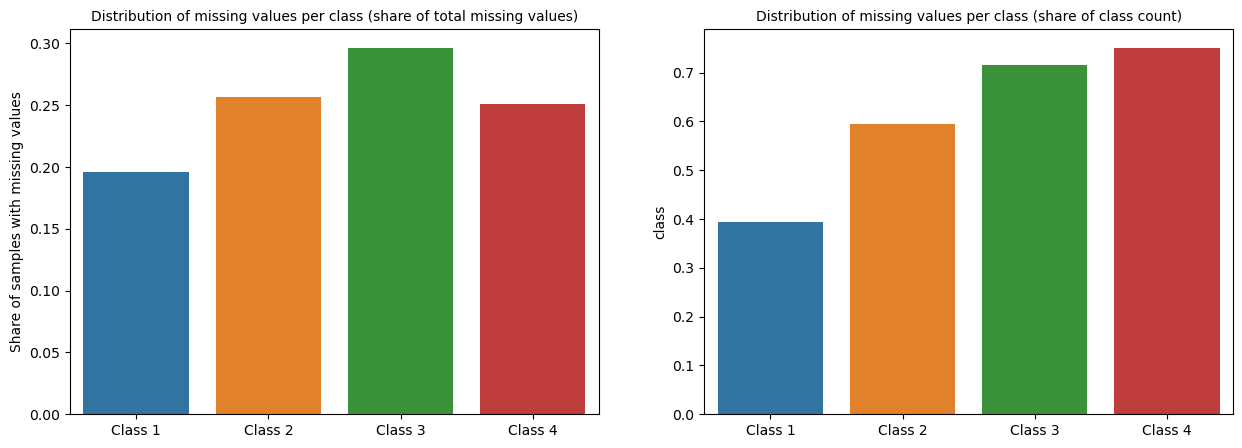

In [6]:
class_counts_raw = df_raw_dataset['class'].value_counts(normalize=False)
class_counts_dropna = df_dropna['class'].value_counts(normalize=False)

num_missing_values = class_counts_raw.values - class_counts_dropna.values
print("Number of missing values per class:", num_missing_values)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=[f'Class {i+1}' for i in range(num_classes)], y=num_missing_values/sum(num_missing_values))
plt.title('Distribution of missing values per class (share of total missing values)', fontsize=10)
plt.ylabel('Share of samples with missing values')

plt.subplot(1, 2, 2)
sns.barplot(x=[f'Class {i+1}' for i in range(num_classes)], y=num_missing_values/class_counts_raw)
plt.title('Distribution of missing values per class (share of class count)', fontsize=10)

plt.show()